In [1]:
import pickle

In [13]:
import pandas as pd
import numpy as np
import gensim

In [3]:
df_arp = pd.read_pickle('US_Accidents_June20_modified.pkl')

In [4]:
df_arp.head(3)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,accDuration,day,month,year,dayOfWeek
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,0,Night,Night,Night,Night,314.0,8,2,2016,0
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,0,Night,Night,Night,Day,30.0,8,2,2016,0
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,0,Night,Night,Day,Day,30.0,8,2,2016,0


In [5]:
accident_Description = df_arp['Description']
accident_Description.head(5)

0    Right lane blocked due to accident on I-70 Eas...
1    Accident on Brice Rd at Tussing Rd. Expect del...
2    Accident on OH-32 State Route 32 Westbound at ...
3    Accident on I-75 Southbound at Exits 52 52B US...
4    Accident on McEwen Rd at OH-725 Miamisburg Cen...
Name: Description, dtype: object

In [36]:
accident_Description.isnull().sum()

1

In [6]:
accident_Description.dropna(inplace=True)

In [7]:
from gensim.models import Word2Vec, KeyedVectors
import nltk

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Henry\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

STOP_WORDS = nltk.corpus.stopwords.words()


accident_words = list()
acc_descs = accident_Description.values.tolist()

for acc_desc in acc_descs:
    # tokenize the text
    tokens = word_tokenize(acc_desc)
    tokens = [w.lower() for w in tokens]
    # remove puntuations
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]   
    words = [word for word in stripped if word.isalnum()]
    
    accident_words.append(words)
    
accident_words[0:2]

[['right',
  'lane',
  'blocked',
  'due',
  'to',
  'accident',
  'on',
  'i70',
  'eastbound',
  'at',
  'exit',
  '41',
  'oh235',
  'state',
  'route',
  '4'],
 ['accident', 'on', 'brice', 'rd', 'at', 'tussing', 'rd', 'expect', 'delays']]

In [14]:
descript_model = gensim.models.Word2Vec(accident_words,sg=0, min_count = 1, size = 100)

vocab_words = list(descript_model.wv.vocab)                                                                      
print(len(vocab_words))

115939


In [16]:
print(descript_model.wv['right'])

[ 1.0261064  -0.4782968   1.8467767  -3.3768106   1.6818061  -3.6250913
 -1.1265564   1.2234533  -1.2657194   2.1903906  -0.76387984 -3.2177303
  0.95665413  3.007439   -1.9354888   0.37922025  0.33382198 -1.1044161
 -1.0363758  -0.5491038   0.9793102   0.9137295  -3.1821184  -2.541355
 -1.5571206   1.2491034  -0.8669039   8.331582   -4.063615    2.1158621
  2.2704232   1.5978181   1.2151113   2.7025487  -0.33382207 -1.8396045
 -0.963319   -2.7385528   4.027408    0.91348255 -5.5980163  -0.5097151
  1.8219981  -4.7624726  -3.3167698   1.3864849  -1.6380134   1.0055976
  1.0121188  -3.100438    0.47566774  1.9820839   2.7310731  -2.0438354
  2.6239624  -2.0875978   3.3794343   3.1216953  -1.934896    1.7696929
 -2.386086    0.5266452   1.0670229   2.9514894  -0.6427333   0.10470279
  0.358812   -4.0489097  -1.552218    1.0201106  -0.3416831  -2.067096
  0.3606171   1.9331748   1.1454879   1.0661063  -0.5048192   1.9850503
 -0.3763151  -1.3223227  -4.2319174   2.6370142   0.66647524 -0.8

In [18]:
descript_model.wv.most_similar(['right'])

[('left', 0.9854912161827087),
 ('one', 0.8674978017807007),
 ('hov', 0.7532336711883545),
 ('1', 0.7086288928985596),
 ('middle', 0.6866719722747803),
 ('center', 0.6802629232406616),
 ('multivehicle', 0.67775559425354),
 ('two', 0.6701303720474243),
 ('slow', 0.6580155491828918),
 ('hand', 0.621357798576355)]

In [20]:
descript_model.wv.most_similar(['exit'])

[('exits', 0.909766674041748),
 ('entry', 0.5253697633743286),
 ('accident', 0.465886652469635),
 ('mm', 0.4515005648136139),
 ('highway', 0.41362303495407104),
 ('on', 0.3727914094924927),
 ('mile', 0.3709530830383301),
 ('earlier', 0.36107903718948364),
 ('route', 0.35979989171028137),
 ('mp', 0.3582194447517395)]

In [28]:
# Let's save the model to file!
model = descript_model.save('w2v_model.p')

In [26]:
descript_model.save('w2v_model.txt')

C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


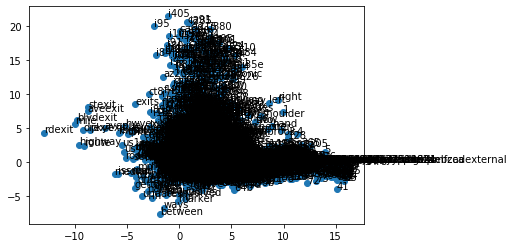

<Figure size 1440x1440 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

my_model = gensim.models.Word2Vec.load('my_vecs.p')

model_vocab = my_model.wv.vocab

pca = PCA(n_components=2)

my_pca = pca.fit_transform(my_model[model_vocab])

plt.scatter(my_pca[:,0], my_pca[:,1])

for i, word in enumerate(model_vocab):
    plt.annotate(word, xy=(my_pca[i,0], my_pca[i,1]))

     
plt.figure(figsize=(20, 20))     
plt.show()